
# Project: G2M insight for Cab Investment firm¶
By Rania Tarek Fleifel


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Data Cleaning </a></li>
<li><a href="#eda">Exploratory Data Analysis Hypotheses</a></li>
<li><a href="#conclusions">Buisness Recommendation</a></li>
</ul>


<a id='intro'></a>

## Introduction

### Buisness Problem

#### Deciding on the best investment for XYZ company in the cab industry. The two companies in question are "yellow cab" & "pink cab".

### Dataset Description 

#### In this project, I investigate data provided from the market for both companies to provide buisness recommendation and insight for XYZ company. This database provide various metrics that define the relation governing cab company's buisness and key features at play. It also provides city-specific and costumer-specific infromation. 
#### In this project, I investigate data provided from the market for both companies to provide buisness recommendation and insight for XYZ company. This database provide various metrics that define the relation governing cab company's buisness and key features at play. It also provides city-specific and costumer-specific infromation. 

##### Variables after data cleaning and new features are: (Total:19) 

     - 'trans_id'--> ride's unique identifier
     - 'company'--> yellow_cab or pink_cab
     - 'city'--> ride's location  
     - 'kms'--> ride's distance covered in kms 
     - 'c_paytype'--> ride's payement method cash or credit  
     - 'costumer_id' --> rider's unique identifier  
     - 'gender'--> rider's gender 
     - 'c_age'--> age of rider 
     - 'c_income'--> income USD/month of rider 
     - 'population'--> city's population
     - 'users'--> city's cab users 
     - 'traveldate'--> ride's date %d-%M-%Y
     - 'cost_km'--> ride's 'cost/kms'
     - 'charged_km'--> ride's 'charged/kms'
     - 'weekendnot'--> whether date of ride is a weekend (Sat,Sun) or not
     - 'holidaynot'--> whether date of ride is a US holiday (**https://www.timeanddate.com/holidays/us/?hol=25) or not
     - 'agegrp'--> rider's age group (youth or adult or older)
     - 'year'--> extracted from traveldate
     - 'month'--> extracted from traveldate



In [1]:
#Import libraries necessary 

import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

# Loading databases
base_url="https://raw.githubusercontent.com/DataGlacier/DataSets/main/"
filenames=['Cab_Data.csv','Transaction_ID.csv','City.csv','Customer_ID.csv']

df_cab=pd.read_csv(base_url+filenames[0])
df_transactions=pd.read_csv(base_url+filenames[1])
df_city=pd.read_csv(base_url+filenames[2])
df_costumer=pd.read_csv(base_url+filenames[3])


<a id='wrangling'></a>

## Data Wrangling 

        
### Inspect data sets and look for instances of missing or possibly errant data.
- per feature information

     1) datatype
     2) missing values
     3) number of zerovalues
     
     
- Check for duplicates and drop them if exist
- Check for missing (nan) data and handle them if exist

In [2]:
dfs=[df_cab,df_transactions,df_city,df_costumer]

for i in range(len(dfs)):
    max_entries=dfs[i].nunique().max()
    print("*********************************************************************\nMaximum number of unique entries of {}= {}".format(filenames[i],max_entries))

    cols=dfs[i].columns.tolist()
    print("Each Column's unique entries, types & number of zeros:")
    for col in cols:
        print("\t{}   {} {}s , {} zeros".format(col,dfs[i][col].nunique(),dfs[i].dtypes[col],(dfs[i][col]==0).sum()));
        
    if len(dfs[i])==max_entries: #OR #if sum(dfs[i].duplicated())==0:
        print('No duplicates found')
    else:
        dfs[i]=dfs[i].drop_duplicates()
        print('{} duplicates found and deleted'.format(sum(dfs[i].duplicated())))
        
    cols_w_nans=df_cab.columns[df_cab.isnull().any()].tolist()
    print("{} columns have missing values.".format(cols_w_nans)) if cols_w_nans else print("No missing values")



*********************************************************************
Maximum number of unique entries of Cab_Data.csv= 359392
Each Column's unique entries, types & number of zeros:
	Transaction ID   359392 int64s , 0 zeros
	Date of Travel   1095 int64s , 0 zeros
	Company   2 objects , 0 zeros
	City   19 objects , 0 zeros
	KM Travelled   874 float64s , 0 zeros
	Price Charged   99176 float64s , 0 zeros
	Cost of Trip   16291 float64s , 0 zeros
No duplicates found
No missing values
*********************************************************************
Maximum number of unique entries of Transaction_ID.csv= 440098
Each Column's unique entries, types & number of zeros:
	Transaction ID   440098 int64s , 0 zeros
	Customer ID   49171 int64s , 0 zeros
	Payment_Mode   2 objects , 0 zeros
No duplicates found
No missing values
*********************************************************************
Maximum number of unique entries of City.csv= 20
Each Column's unique entries, types & number of zeros:


### Create a unified dataset aka Merging data 

    - We merge data to cab_data.csv since it's the only file that contain how the data correlated to the companies. Any data that doesn't support reaching the buisness goal is ignored (hence inner is used when merging)
    
    - Each file is merged depending on its unique_identifier

In [3]:
#Merging data 

#merge transactions to cab_data on transaction_IDs that are present in cab_data 
df_merge1=df_cab.merge(df_transactions, how='inner', on='Transaction ID')
#merge costumer data with merged1 , both have same number of costumer_ID 
df_merge2=df_merge1.merge(df_costumer,how='inner',on='Customer ID')
#merge city with ALL data because there might be missed opportunity there! 
df=df_merge2.merge(df_city,how='inner',on='City')

df.info()
display(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
Transaction ID        359392 non-null int64
Date of Travel        359392 non-null int64
Company               359392 non-null object
City                  359392 non-null object
KM Travelled          359392 non-null float64
Price Charged         359392 non-null float64
Cost of Trip          359392 non-null float64
Customer ID           359392 non-null int64
Payment_Mode          359392 non-null object
Gender                359392 non-null object
Age                   359392 non-null int64
Income (USD/Month)    359392 non-null int64
Population            359392 non-null object
Users                 359392 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"



### Data Cleaning
 
In this cell:

1) Remove whitespace and lowercase all data and feature names

2) Rename feature names

3) Replace spaces by _ in strings

4) Remove ‘,’ in thousands in numerical values population and users


In [4]:
#Data cleaning

#transaction related= costumer ID, cash/credit,
#costumer related= age, income, gender
#city related= population, users 

#COLUMNS
df.columns=df.columns.str.lower()
df.rename(columns={'transaction id':'trans_id','date of travel':'travel_date','km travelled': 'kms','price charged':'charged','cost of trip':'tripcost','customer id':'costumer_id','payment_mode':'c_paytype','age':'c_age','income (usd/month)':'c_income'},inplace=True)

#DATA 
df = df.applymap(lambda s: s.lower() if type(s) == str else s) #makesure all columns and str values are lowercase
df = df.applymap(lambda s: s.strip() if type(s) == str else s) #strip any whitespace at the beginning and end of strings
df = df.applymap(lambda s: s.replace(' ', '_') if type(s) == str else s) #replace spaces in strings with _ 
#df = df.applymap(lambda s: s.split(' ')[0] if type(s) == str else s) #replace spaces in strings with _ 

df['users']=df['users'].str.replace(',', '').astype(int)
df['population']=df['population'].str.replace(',', '').astype(int)


df.head()

,trans_id,travel_date,company,city,kms,charged,tripcost,costumer_id,c_paytype,gender,c_age,c_income,population,users
0,10000011,42377,pink_cab,atlanta_ga,30.45,370.95,313.6350,29290,card,male,28,10813,814885,24701
1,10351127,43302,yellow_cab,atlanta_ga,26.19,598.70,317.4228,29290,cash,male,28,10813,814885,24701
2,10412921,43427,yellow_cab,atlanta_ga,42.55,792.05,597.4020,29290,card,male,28,10813,814885,24701
3,10000012,42375,pink_cab,atlanta_ga,28.62,358.52,334.8540,27703,card,male,27,9237,814885,24701
4,10320494,43211,yellow_cab,atlanta_ga,36.38,721.10,467.1192,27703,card,male,27,9237,814885,24701


### Data Processing into new features 

1) Process traveldate to reflect actual dates, create 'travedate' and drop rows beyond required time interval and drop 'travel_date'

    - To make sense of the travel date column, my required data is between 31/1/2016 and 31/12/2018 which are 1065 days. However, data provided are 1095 points. Using timestamp is common to refair to a date by an integer. To use it, dates are usually referred to 1970. Trying the first integer provided 42371/365 days = 116 years and 42371%365=31 days.. Since my start date is in year 2016, this means that the numbers provided are in reference to year 1990.
    - To make sure of this logic, I refair our numbers to 1970 by subtracting 70 years (in days) and use utcfromtimestamp 


In [5]:
#PROCESS DATA TO BE BENEFICIAL

#1) TRAVELDATE

dates_interval=datetime.date(2018, 12, 31)-datetime.date(2016, 1, 31) #1065

date1=datetime.date(2016, 1, 1)
date2=datetime.date(2018, 12, 31)

n1=df.travel_date.min()
n2=df.travel_date.max()

for i in range(n2-n1+1):
    current_date=date1+datetime.timedelta(days=i)
    date_indices=df.query('travel_date==@n1+@i').index.tolist()
    current_date_format=datetime.datetime.strftime(current_date,'%d-%m-%Y')
    df.loc[date_indices,'traveldate']=current_date_format
    print(i)
    
df['traveldate'] = df['traveldate'].astype('datetime64[ns]')
df.drop(columns=['travel_date'],inplace=True)

#################################################################################
# date1=datetime.date(2016, 1, 31)
# date2=datetime.date(2018, 12, 31)

# n1=df.travel_date.min()
# n2=df.travel_date.max()

# for i in range(n2-n1+1):
#     current_date=date1+datetime.timedelta(days=i)
#     date_indices=df.query('travel_date==@n1+@i').index.tolist()
#     current_date_format=datetime.datetime.strftime(current_date,'%d-%m-%Y')
#     df.loc[date_indices,'traveldate']=current_date_format
#     print(i)
    
# df['traveldate'] = df['traveldate'].astype('datetime64[ns]')

# df.drop(columns=['travel_date'],inplace=True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2) Create: 'cost_km','charged_km' and drop cols: 'charged','tripcost'
    - 'cost_km'=tripcost/kms
    - 'charged_km'=charged/kms

3) Create: weekendnot=bool 
    - each day of the week is labeled by an integer, so i check if the int>4 meaning it's either Saturday or Sunday and assign holiday/not bool accordingly 
    
4) Create: holidaynot=bool 
    - Define a list of holidays in the US
    **https://www.timeanddate.com/holidays/us/?hol=25
    
    - Assign 1s where release_date coincide with that list and 0s otherwise

5) Create agegrp 
    - Divide riders into youth<25years, 25years<=adult<=50years, older>50years

6) Create month,year 
    - Extracted from traveldate
    

In [6]:
#cost_km,charged_km

df['cost_km']=df.tripcost/df.kms
df['charged_km']=df.charged/df.kms

df.drop(columns=['charged','tripcost'],inplace=True)


#weekendnot
weekend_ornot=df.traveldate.dt.dayofweek 
df['weekendnot']= [0] * len(df.index)
weekends_ind=weekend_ornot[weekend_ornot>4].index.tolist() 
df.loc[weekends_ind,'weekendnot']=1

#holidaynot
holidays=['1-1','1-17','2-14','2-21','3-17','4-17','4-18','5-5','5-8','5-30','6-14','6-19','6-20','7-4','9-5','10-10','10-31','11-8','11-11','11-24','12-24','12-25','12-26','12-31']

dfnew_dates=df['traveldate'].astype(str).str.split(pat='-',n=1).str.get(1)
df['holidaynot'] = [0] * len(df.index)
holiday_or_not=dfnew_dates.isin(holidays)   
df.loc[holiday_or_not,'holidaynot']=1

#Agegroups
agegrp_youth=df.query('c_age<25').index.tolist() #youth
df.loc[agegrp_youth,'age_grp']='youth'

agegrp_adults=df.query('c_age>25 & c_age<50').index.tolist() #adults
df.loc[agegrp_adults,'age_grp']='adults'

agegrp_older=df.query('c_age>50').index.tolist()  
df.loc[agegrp_older,'age_grp']='older'

#Year and Month 
df['year']=df['traveldate'].astype(str).str.split(pat='-',n=1).str.get(0)

df['month']=df['traveldate'].astype(str).str.split(pat='-',n=2).str.get(1)

df.to_csv('cabinvestment_data.csv')

display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
trans_id       359392 non-null int64
company        359392 non-null object
city           359392 non-null object
kms            359392 non-null float64
costumer_id    359392 non-null int64
c_paytype      359392 non-null object
gender         359392 non-null object
c_age          359392 non-null int64
c_income       359392 non-null int64
population     359392 non-null int32
users          359392 non-null int32
traveldate     359392 non-null datetime64[ns]
cost_km        359392 non-null float64
charged_km     359392 non-null float64
weekendnot     359392 non-null int64
holidaynot     359392 non-null int64
age_grp        343330 non-null object
year           359392 non-null object
month          359392 non-null object
dtypes: datetime64[ns](1), float64(3), int32(2), int64(6), object(7)
memory usage: 62.1+ MB


None

,trans_id,company,city,kms,costumer_id,c_paytype,gender,c_age,c_income,population,users,traveldate,cost_km,charged_km,weekendnot,holidaynot,age_grp,year,month
0,10000011,pink_cab,atlanta_ga,30.45,29290,card,male,28,10813,814885,24701,2016-07-01,10.30,12.182266,0,0,adults,2016,07
1,10351127,yellow_cab,atlanta_ga,26.19,29290,cash,male,28,10813,814885,24701,2018-07-20,12.12,22.859870,0,0,adults,2018,07
2,10412921,yellow_cab,atlanta_ga,42.55,29290,card,male,28,10813,814885,24701,2018-11-22,14.04,18.614571,0,0,adults,2018,11
3,10000012,pink_cab,atlanta_ga,28.62,27703,card,male,27,9237,814885,24701,2016-05-01,11.70,12.526904,1,0,adults,2016,05
4,10320494,yellow_cab,atlanta_ga,36.38,27703,card,male,27,9237,814885,24701,2018-04-20,12.84,19.821330,0,0,adults,2018,04


<a id='eda'></a>

## Exploratory Data Analysis Hypotheses

### 1) Status quo of market 

Status quo of both companies in the cab market


,profit,num_costumers,num_rides
0,62.652174,32330,84711
1,160.259986,39896,274681


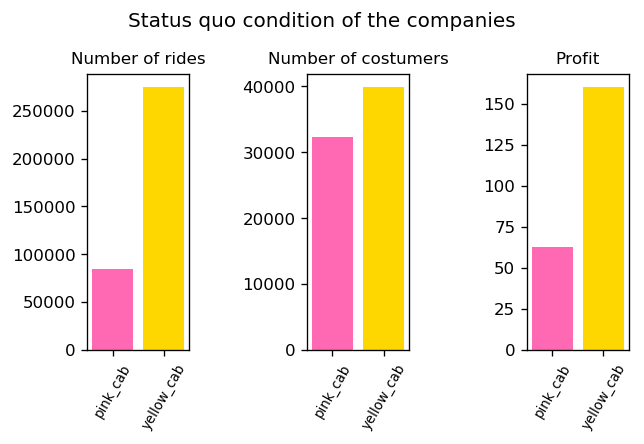

In [7]:
#profit 
df['profit']=(df.charged_km-df.cost_km)*df.kms

df.groupby('company').sum()

#status quo table
status_quo=pd.DataFrame(columns={'num_rides','num_costumers','profit'})
status_quo.num_rides=df.groupby('company').count().trans_id.tolist()
status_quo.num_costumers=df.groupby('company').costumer_id.nunique().tolist()
status_quo.profit=df.groupby('company').mean().profit.tolist()

print('Status quo of both companies in the cab market')
display(status_quo)


x=df.company.unique()
data1=status_quo.num_rides.values.tolist()
data2=status_quo.num_costumers.values.tolist()
data3=status_quo.profit.values.tolist()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,dpi=120)
fig.suptitle('Status quo condition of the companies')
ax1.bar(x,data1,label = 'rides',color=['hotpink','gold'])
ax1.set_title('Number of rides', fontsize=10)
ax1.set_xticklabels(x, rotation=60,fontsize=8)

ax2.bar(x,data2,label = 'costumers',color=['hotpink','gold'])
ax2.set_title('Number of costumers', fontsize=10)
ax2.set_xticklabels(x, rotation=60,fontsize=8)

ax3.bar(x,data3,label = 'profit',color=['hotpink','gold'])
ax3.set_title('Profit', fontsize=10)
ax3.set_xticklabels(x, rotation=60,fontsize=8)
fig. tight_layout(pad=3)


### Recommendations "Status quo of market "

####       yellow_cab is better than pink_cab in terms of number of costumers, number of rides and mean profit

### 2) Change of profit/km over time


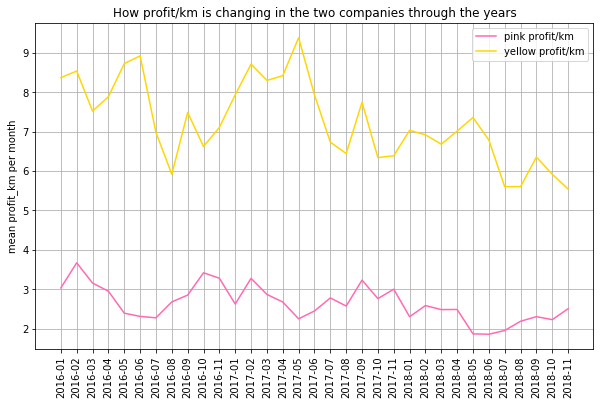

In [8]:
# 4) How is the profit/km of both companies changing over time?

pdata2=[]
ydata2=[]
monthyear=[]

df['profit_km']=df.charged_km-df.cost_km
for i in range(2016,2019):
    for ii in range(1,12):
        i_str=str(i)
        ii_str='0'+str(ii) if ii<10 else str(ii)
        pdata2.append(df.query('company=="pink_cab" & year==@i_str & month==@ii_str')['profit_km'].mean())
        ydata2.append(df.query('company=="yellow_cab" & year==@i_str & month==@ii_str')['profit_km'].mean())
        thismonthyear=df.query('year==@i_str and month==@ii_str')['traveldate'].astype(str).str.rsplit(pat='-',n=1).str.get(0).unique()
        monthyear.append(thismonthyear.tolist()[0])


plt.figure(figsize=(10,6))
#print(monthyear)
plt.plot(monthyear,pdata2,color='hotpink', label = "pink profit/km")
plt.plot(monthyear,ydata2,color='gold', label = "yellow profit/km")
plt.title("How profit/km is changing in the two companies through the years")
#plt.xlabel('Months from 2/2016 to 12/2018')
plt.ylabel('mean profit_km per month')
plt.xticks(monthyear, rotation=90)
plt.grid()
plt.legend()
plt.show()

### Recommendations "Change of the profit/km over time" 

####       Although it looks like yellow_cab perform better, the data spreaded on the 3 years suggests that the profit_km of yellow_cab is deteriorating unlike pink_cab which more or less maintained its profit_km steady 

### 3)  Popularity in each city 

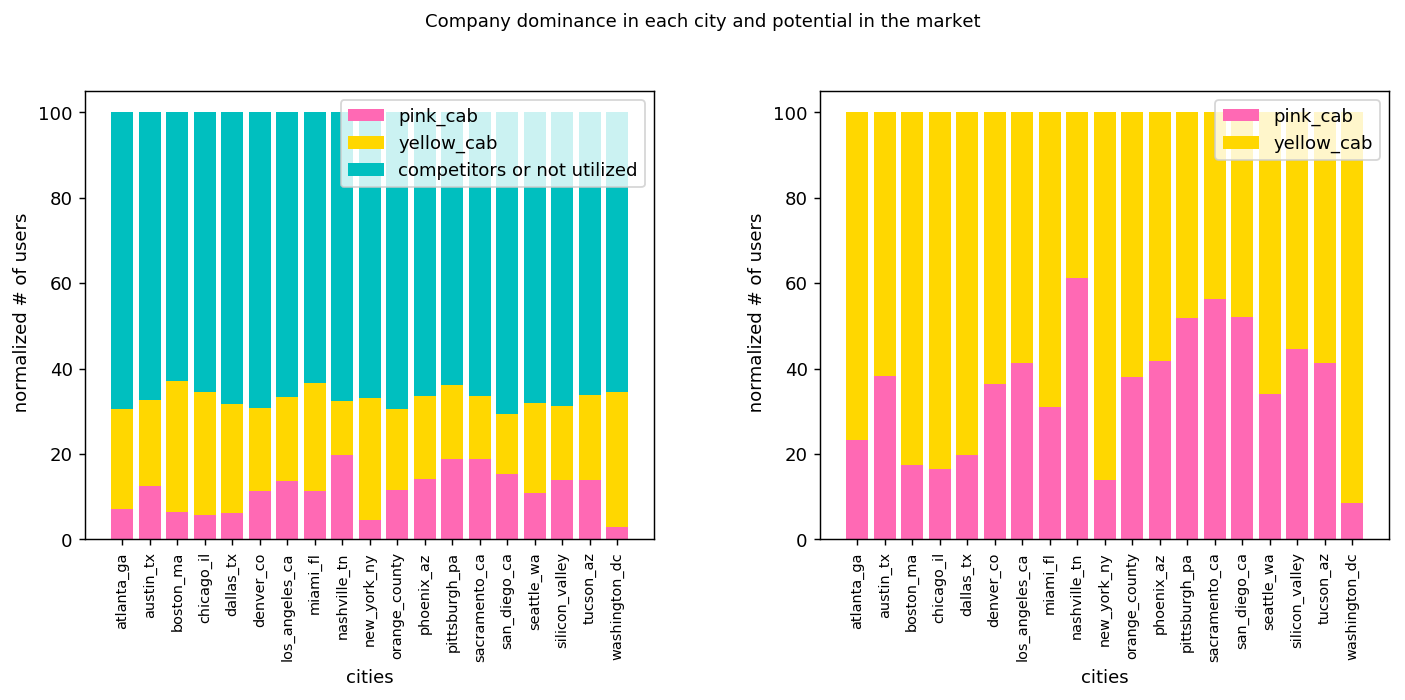

In [9]:

c_y=[]
c_p=[]
c_users=[]
c_py=[]

cities=df.city.unique()

for c in cities:
    c_p.append(df.query('city==@c').groupby('company').users.count().values[0])
    c_y.append(df.query('city==@c').groupby('company').users.count().values[1])
    c_py.append(df.query('city==@c').groupby('company').users.count().sum())
    c_users.append(df.query('city==@c')['users'].mean())

    
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=130,figsize=(12,6))
ax1.bar(cities, 100*pd.np.divide(c_p,c_users), color='hotpink')
ax1.bar(cities, 100*pd.np.divide(c_y,c_users),bottom=100*pd.np.divide(c_p,c_users), color='gold')
ax1.bar(cities,100*(1-pd.np.divide(c_p,c_users)-pd.np.divide(c_y,c_users)),bottom=100*(pd.np.divide(c_p,c_users)+pd.np.divide(c_y,c_users)),color='c')
ax1.set_xlabel("cities")
ax1.set_ylabel(" normalized # of users")
ax1.legend(["pink_cab", "yellow_cab","competitors or not utilized"])#,fontsize=6)
ax1.set_xticklabels(cities, rotation=90,fontsize=8)

ax2.bar(cities, 100*pd.np.divide(c_p,c_py), color='hotpink')
ax2.bar(cities, 100*pd.np.divide(c_y,c_py),bottom=100*pd.np.divide(c_p,c_py), color='gold')
#ax2.bar(cities,100*(1-pd.np.divide(c_p,c_users)-pd.np.divide(c_y,c_users)),bottom=100*(pd.np.divide(c_p,c_users)+pd.np.divide(c_y,c_users)),color='m')
ax2.set_xlabel("cities")
ax2.set_ylabel(" normalized # of users")
ax2.legend(["pink_cab", "yellow_cab"])#,fontsize=6)
ax2.set_xticklabels(cities, rotation=90,fontsize=8)


fig.suptitle("Company dominance in each city and potential in the market", fontsize=10)
fig. tight_layout(pad=5)



###  Recommendations "Popularity in each city"

#### Whether wrt each other and the total number of cab users or just among themselves, when comparing the two companies it's obvious yellow_cab's market share is bigger.

#### It's also interesting the amount of cab_users unutilized by either company! If this market share includes other competitors, maybe XYZ should consider other competitors for investment. In this analysis, we assume this market share is the prospect of XYZ investment. Hence, we look at how markets are changing for both companies over time to choose the company with higher growth chances.  

### 4) Better rates for riders for each city 

Text(0.5, 1.0, 'cost/km rate for both companies')

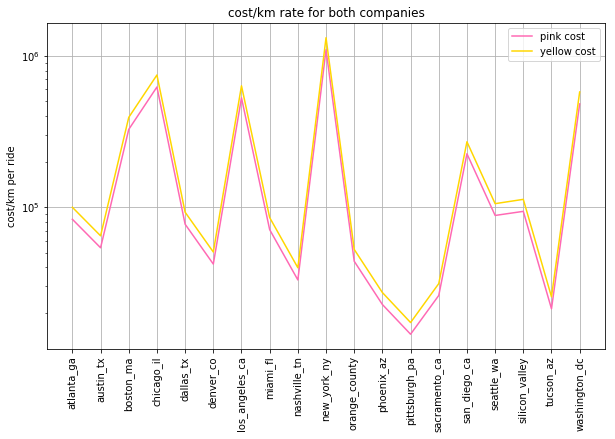

In [15]:
incity=df.groupby(['city'])['cost_km','charged_km','c_income','population','users','profit'].mean()
incity['rides']=df.groupby(['city'])['trans_id'].count()
incity['%ofusers']=incity.users*100/incity.population
incity['profit/ride']=incity['profit']/incity['rides']

# df['costkm'].corr(df['population'])
# #from scipy import stats
# #dfnew[(pd.np.abs(stats.zscore(dfnew)) < 3).all(axis=1)]

# #pv_corr=dfnew['population'].corr(dfnew['users'])
# #print('Correlation between population & cab users= {:.2f}'.format(pv_corr))
# data=df.groupby('city').mean()




pincity=df.query('company=="pink_cab"').groupby(['city'])['cost_km','charged_km','users','profit','c_income','population'].mean()
pincity['rides']=df.query('company=="pink_cab"').groupby(['city'])['trans_id'].count()
pincity['profit/ride']=pincity['profit']/pincity['rides']
pincity['%ofusers']=pincity.users*100/pincity.population


yincity=df.query('company=="yellow_cab"').groupby(['city'])['cost_km','charged_km','population','users','profit','c_income'].mean()
yincity['rides']=df.query('company=="yellow_cab"').groupby(['city'])['trans_id'].count()
yincity['%ofusers']=yincity.users*100/yincity.population
yincity['profit/ride']=yincity['profit']/yincity['rides']


plt.figure(figsize=(10,6))
plt.yscale('log')

plt.plot(cities,(pincity['cost_km']*incity['rides']).tolist(),label='pink cost',color='hotpink')
plt.plot(cities,(yincity['cost_km']*incity['rides']).tolist(),label='yellow cost',color='gold')

# old changed plt.plot(cities,(pincity['cost_km']/pincity['rides']).tolist(),label='pink cost',color='hotpink')
# plt.plot(cities,(yincity['cost_km']/yincity['rides']).tolist(),label='yellow cost',color='gold')
plt.ylabel('cost/km per ride')
plt.legend()
plt.grid()
plt.xticks(cities, rotation=90)
plt.title('cost/km rate for both companies')




### Recommendations "Better rates for riders for each city" 

#### It seems like both companies follow the same charging policy based on kms, with a slight advantage to pink_cab. This is based on the assumption that cost depend only on km while wait time and cancelation fees and such factors are ignored since no data is provided on the time a ride takes to be complete.

### 5) Better Profit scaled to total city rides (wrt years and without years) 

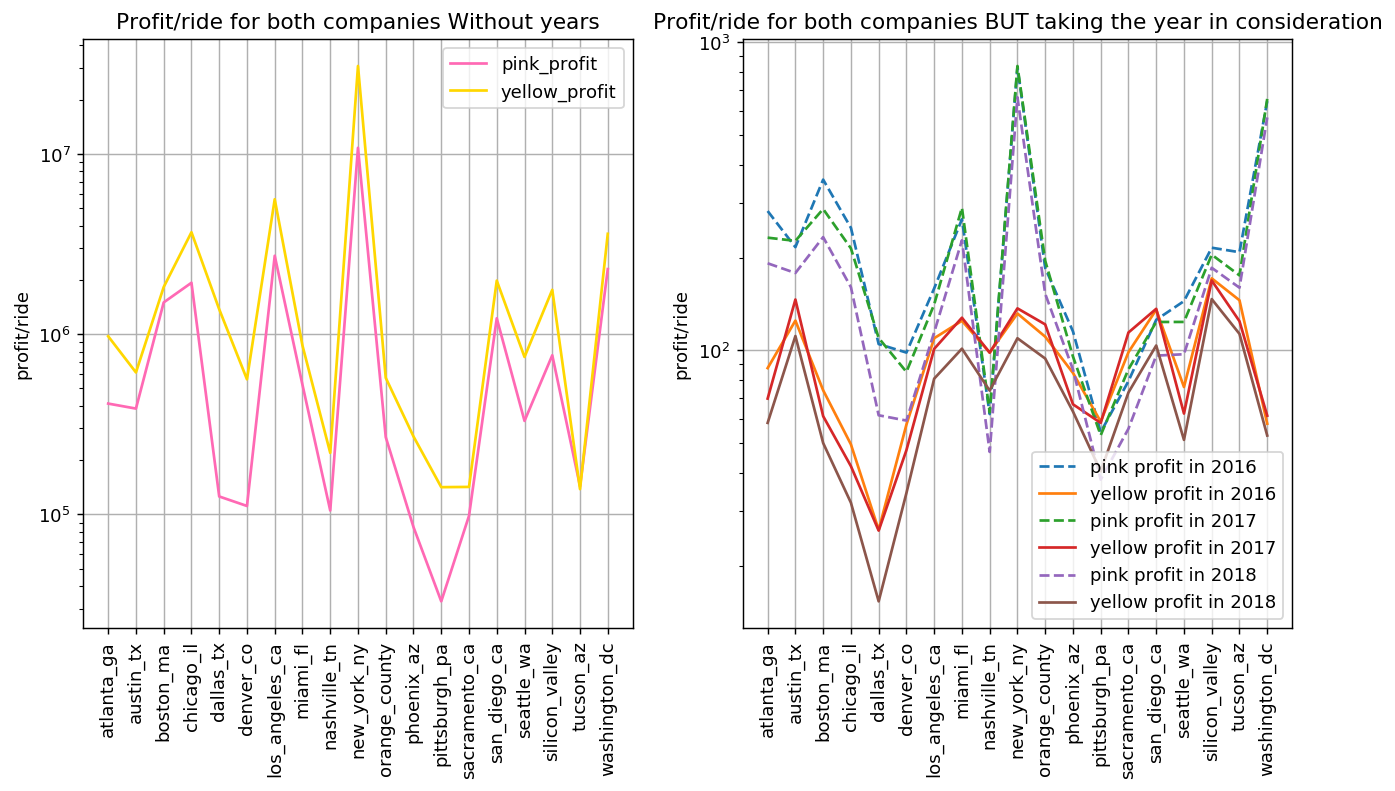

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=130,figsize=(12,6))

#ax = plt.subplot(111)
ax1.set_yscale('log')

ax1.plot(cities,(pincity['profit']*incity['rides']).tolist(),label='pink cost',color='hotpink')
ax1.plot(cities,(yincity['profit']*incity['rides']).tolist(),label='yellow cost',color='gold')
ax1.set(ylabel='profit/ride')
ax1.set_xticklabels(cities, rotation=90)
ax1.grid()
ax1.legend(["pink_profit", "yellow_profit"])
ax1.set_title('Profit/ride for both companies Without years')
############################

years=["2016","2017","2018"]
ax2.set_yscale('log')

for iyear in years:
    p=df.query('company=="pink_cab" & year==@iyear').groupby(['city'])['profit',"charged_km"].mean()
    p['rides']=df.query('company=="pink_cab" & year==@iyear').groupby(['city'])['trans_id'].count()
    p['profit/ride']=p['profit']/p['rides']
    
    y=df.query('company=="pink_cab" & year==@iyear').groupby(['city'])['profit',"charged_km"].mean()
    y['rides']=df.query('company=="yellow_cab" & year==@iyear').groupby(['city'])['trans_id'].count()
    y['profit/ride']=y['profit']/y['rides']
    
    x=df.query('year==@iyear').groupby(['city'])['trans_id'].count()

    ax2.plot(cities,(p['profit/ride']*x).tolist(),label='pink profit in %d' % int(iyear),linestyle='dashed',)
    ax2.plot(cities,(y['profit/ride']*x).tolist(),label='yellow profit in %d' % int(iyear))

    ax2.set(ylabel='profit/ride')
    ax2.set_xticklabels(cities, rotation=90)#,fontsize=3)


plt.legend()
plt.grid()
ax2.set_title('Profit/ride for both companies BUT taking the year in consideration')
plt.show()

### Recommendations "Better Profit scaled to total city rides (wrt years and without years)" 

#### Dealing with the time interval as one chunk of data suggests that yellow_cab is more profitable in all the cities. 

#### Considering each year's rides seperately, it's shows that the scaled performance of pink_cab is better in the profits deprtement. It's also shown that the cab market in general was slowing down since the profits of the two companies in 2018 are less relative to their profits in 2016

### 6) Which company is Safer?

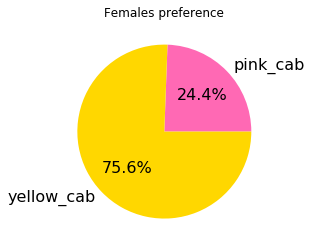

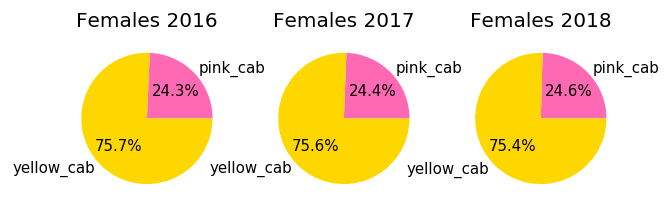

In [17]:
female=df.groupby('gender').costumer_id.count().values.tolist()[0]
female_pink=df.query('company=="pink_cab"').groupby('gender').costumer_id.count().values.tolist()[0]
female_yellow=female-female_pink

female_data=[female_pink,female_yellow]
female_pie=100*pd.np.array(female_data)/sum(female_data)

mylabels=['pink_cab','yellow_cab']

#fig1, (ax1, ax2) = plt.subplots(1, 2,dpi=120)
plt.figure(figsize=(4,4))
plt.pie(female_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['hotpink','gold'])
plt.title("Females preference");

q16=df.query('year=="2016"').groupby('gender')
q17=df.query('year=="2017"').groupby('gender')
q18=df.query('year=="2018"').groupby('gender')

n16=q16.costumer_id.count()
f16=n16[0]
n17=q17.costumer_id.count()
f17=n17[0]
n18=q18.costumer_id.count()
f18=n18[0]

nf16=df.query('year=="2016"').groupby(['gender','company']).costumer_id.count()
pnf16=nf16[0]
ynf16=nf16[1]

nf17=df.query('year=="2017"').groupby(['gender','company']).costumer_id.count()
pnf17=nf17[0]
ynf17=nf17[1]

nf18=df.query('year=="2018"').groupby(['gender','company']).costumer_id.count()
pnf18=nf18[0]
ynf18=nf18[1]

female_data=[pnf16,ynf16]
female_pie=100*pd.np.array(female_data)/sum(nf16)

mylabels=['pink_cab','yellow_cab']

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3,dpi=120)
ax1.pie(female_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 9},colors=['hotpink','gold'])
ax1.set_title("Females 2016");

female_data=[pnf17,ynf17]
female_pie=100*pd.np.array(female_data)/sum(nf17)
ax2.pie(female_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 9},colors=['hotpink','gold'])
ax2.set_title("Females 2017");

female_data=[pnf18,ynf18]
female_pie=100*pd.np.array(female_data)/sum(nf18)
ax3.pie(female_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 9},colors=['hotpink','gold'])
ax3.set_title("Females 2018");


### Recommendations "Which company is Safer ?"

#### We consider women riders as our tell to answer this question. It's obvious that women are slowly shifting to pink_cab over the years

### 7)  Which company has a better UI?

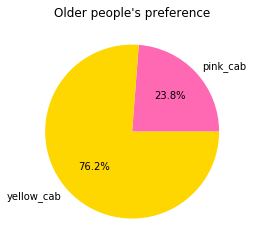

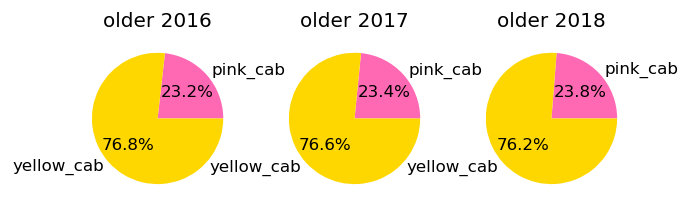

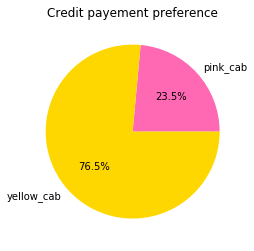

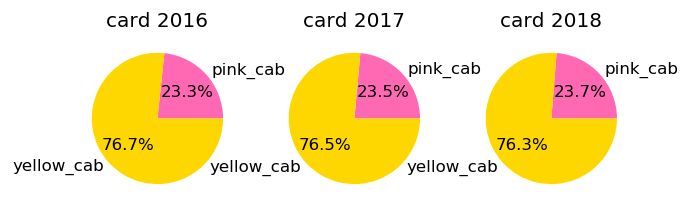

In [18]:
# 2) Which company has a better UI? i.e. older people prefer it and costumers trust it to use credit

py_older=df.query('age_grp=="older"').groupby(['company']).count()['c_age'].tolist()
older_data=py_older
older_pie=100*pd.np.array(older_data)/sum(py_older)

mylabels=['pink_cab','yellow_cab']


#fig1, (ax1, ax2) = plt.subplots(1, 2,dpi=120)
plt.figure(figsize=(4,4))
plt.pie(older_pie, labels = mylabels,autopct='%1.1f%%',colors=['hotpink','gold'])
plt.title("Older people's preference");


########################################
q16=df.query('year=="2016"').groupby('age_grp')
q17=df.query('year=="2017"').groupby('age_grp')
q18=df.query('year=="2018"').groupby('age_grp')

n16=q16.costumer_id.count()
o16=n16[1]
n17=q17.costumer_id.count()
o17=n17[1]
n18=q18.costumer_id.count()
o18=n18[1]

no16=df.query('year=="2016"').groupby(['age_grp','company']).costumer_id.count()
pno16=no16[0]
yno16=no16[1]

no17=df.query('year=="2017"').groupby(['age_grp','company']).costumer_id.count()
pno17=no17[0]
yno17=no17[1]

no18=df.query('year=="2018"').groupby(['age_grp','company']).costumer_id.count()
pno18=no18[0]
yno18=no18[1]

older_data=[pno16,yno16]
older_pie=100*pd.np.array(older_data)/sum(no16)

mylabels=['pink_cab','yellow_cab']

fig11, (ax11, ax22, ax33) = plt.subplots(1, 3,dpi=120)
ax11.pie(older_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax11.set_title("older 2016");

older_data=[pno17,yno17]
older_pie=100*pd.np.array(older_data)/sum(no17)
ax22.pie(older_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax22.set_title("older 2017");

older_data=[pno18,yno18]
older_pie=100*pd.np.array(older_data)/sum(no18)
ax33.pie(older_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax33.set_title("older 2018");


###################################################################################

py_method=df.query('c_paytype=="card"').groupby(['company']).count()['c_age'].tolist()
method_data=py_method
methpd_pie=100*pd.np.array(method_data)/sum(py_method)

plt.figure(figsize=(4,4))
plt.pie(methpd_pie, labels = mylabels,autopct='%1.1f%%',colors=['hotpink','gold']);
plt.title("Credit payement preference");
#.subplots_adjust(wspace  =2)
plt.show()

##################################################################################
q16=df.query('year=="2016"').groupby('c_paytype')
q17=df.query('year=="2017"').groupby('c_paytype')
q18=df.query('year=="2018"').groupby('c_paytype')

n16=q16.costumer_id.count()
o16=n16[1]
n17=q17.costumer_id.count()
o17=n17[1]
n18=q18.costumer_id.count()
o18=n18[1]

nc16=df.query('year=="2016"').groupby(['c_paytype','company']).costumer_id.count()
pnc16=nc16[0]
ync16=nc16[1]

nc17=df.query('year=="2017"').groupby(['c_paytype','company']).costumer_id.count()
pnc17=nc17[0]
ync17=nc17[1]

nc18=df.query('year=="2018"').groupby(['c_paytype','company']).costumer_id.count()
pnc18=nc18[0]
ync18=nc18[1]

card_data=[pnc16,ync16]
card_pie=100*pd.np.array(card_data)/sum(nc16)

mylabels=['pink_cab','yellow_cab']

fig111, (ax111, ax222, ax333) = plt.subplots(1, 3,dpi=120)
ax111.pie(card_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax111.set_title("card 2016");

card_data=[pnc17,ync17]
card_pie=100*pd.np.array(card_data)/sum(nc17)
ax222.pie(card_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax222.set_title("card 2017");

card_data=[pnc18,ync18]
card_pie=100*pd.np.array(card_data)/sum(no18)
ax333.pie(card_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10},colors=['hotpink','gold'])
ax333.set_title("card 2018");


### Recommendations "Which company has a better UI?"

#### To compare User interfaces, we consider two factors. The first being how much older riders use the app. The second being how reliable and well-established the app is such that users' can safely store their credit card information. 

#### It's shown that older riders and credit card users are both slowly, again, shifting toward pink_cab. 

### 8) Loyality of costumers 

len(frequent_rides) 46148
len(frequent_rides) 19129
False 19129
total 19129


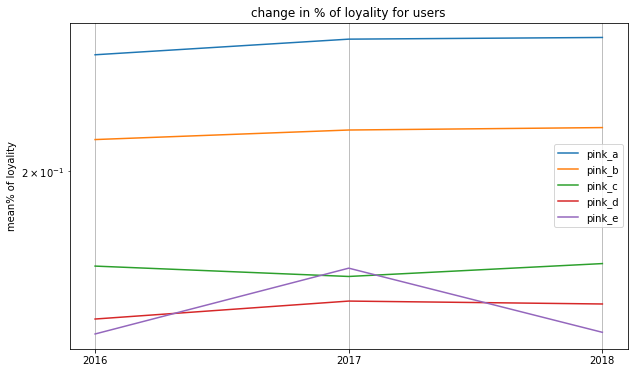

In [19]:

frequent_rides=df.groupby(['costumer_id'])['trans_id'].count()
df.groupby(['costumer_id'])['trans_id'].count()

# #frequent_rides.drop([frequent_rides==1])
print('len(frequent_rides)',len(frequent_rides)) #46148
frequent_rides.drop(frequent_rides[frequent_rides<5].index, inplace=True) #28629 ex 6241(4rides)
print('len(frequent_rides)',len(frequent_rides)) 
frequent_costumer_ids=frequent_rides.index.tolist()
print(6241 in frequent_costumer_ids,len(frequent_costumer_ids))

yearso=['2016', '2017', '2018']
rania = pd.np.zeros((len(frequent_costumer_ids),7))
ind=0
print('total',len(frequent_costumer_ids))
#print('error',frequent_costumer_ids[58698])
for c in frequent_costumer_ids:
    #print(frequent_costumer_ids[c])
    frequent_info=df.query('costumer_id==@c')[['company','year','costumer_id']]
    rides_array=[]
    #print('c=',c,frequent_rides[c])#,frequent_costumer_ids[c])
    rides_array.append(frequent_rides[c])
    for y in yearso:
            p_rides=len(frequent_info.query('year==@y and company=="pink_cab"'))
            y_rides=len(frequent_info.query('year==@y and company=="yellow_cab"'))
            if p_rides+y_rides>0:
                rides_array.append("{:.3f}".format((p_rides/(p_rides+y_rides))))
                rides_array.append("{:.3f}".format(y_rides/(p_rides+y_rides)))
            else:
            #    print(c)
                rides_array.append('0.000')
                rides_array.append('0.000')
                    
    #print(rides_array)
    rania[ind]=rides_array
    ind=ind+1
    #print(ind)

dfrania=pd.DataFrame({'rides':rania[:,0],'p16':rania[:,1],'p17':rania[:,3],'p18':rania[:,5],'y16':rania[:,2],'y17':rania[:,4],'y18':rania[:,6]})

dfrania.describe()#min(),dfrania.rides.max()

a=dfrania.query('rides<15')[['p16','p17','p18']].mean().tolist()
b=dfrania.query('rides>=15 and rides<25')[['p16','p17','p18']].mean().tolist() #quantile(0.9)
#INSTEAD OF GENERIC MEAN, TAKE MEAN OF BATCHES OF DATA!! 
c=dfrania.query('rides>=25 and rides<35')[['p16','p17','p18']].mean().tolist()
d=dfrania.query('rides>=35 and rides<45')[['p16','p17','p18']].mean().tolist()
e=dfrania.query('rides>=45')[['p16','p17','p18']].mean().tolist()

bb=dfrania.query('rides>=15 and rides<25')[['p16','p17','p18']]

plt.figure(figsize=(10,6))
plt.yscale('log')
plt.plot(yearso,a, label="pink_a");
plt.plot(yearso,b, label="pink_b");
plt.plot(yearso,c, label="pink_c");
plt.plot(yearso,d, label="pink_d");
plt.plot(yearso,e, label="pink_e");
plt.ylabel('mean% of loyality')
plt.legend()
plt.grid()
plt.xticks(yearso)#, rotation=90)
plt.title('change in % of loyality for users');


### Recomendations "Loyality of costumers"

#### It looks like more or less, the change in loyality of costumers over the years is insignificant. This is confirmed through dividing loyal costumers according to the number of rides they take with one company. Of course, this means that costumers of group e (>45 rides) are composed of a small group of riders. There is some minor change in this particular category, but it's still on the negigable side that doesn't require a course of action. 

### 9) Trends in date of rides, (particularly holidays and weekends) effect on the profit 

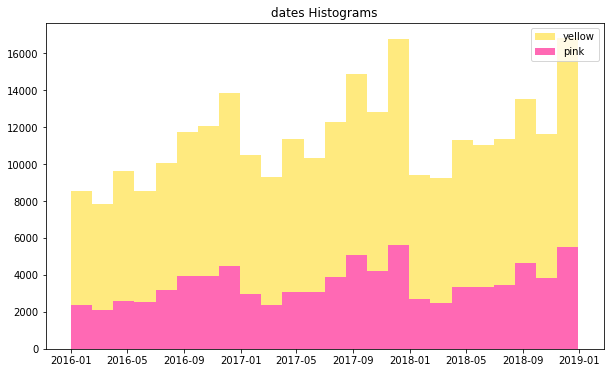

In [20]:
#Trend of date of rides 

# for a warning 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

qdf1=df.query('company=="pink_cab"')
qdf2=df.query('company=="yellow_cab"')

plt.figure(figsize=(10,6))
plt.hist(qdf2.traveldate, bins=24 , alpha=0.5, label="yellow",color='gold');
plt.hist(qdf1.traveldate, bins=24 , alpha=1, label="pink",color='hotpink');

plt.title("dates Histograms")
plt.legend(loc='upper right')
plt.show()

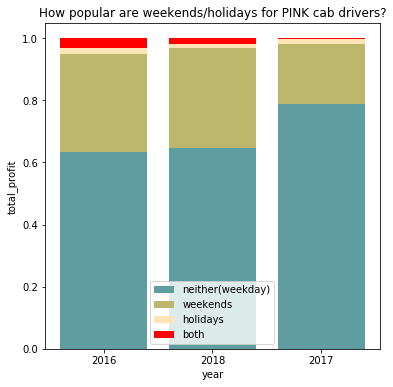

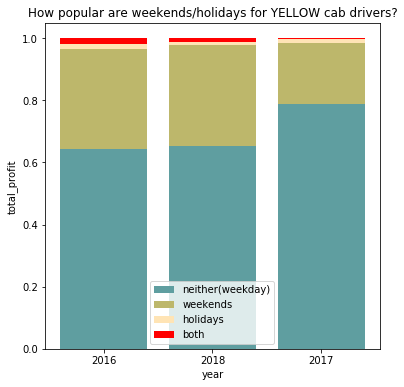

In [21]:
#Holiday and weekend effect on profit and discremenants between the two companies 

r=df.groupby(['company','weekendnot','holidaynot','year']).sum()['profit_km']
per_year=df.groupby(['company','year']).sum()['profit_km'] #profit per year
years=df['year'].unique()

pneither_nor=r['pink_cab',0,0,]/per_year['pink_cab',]
pon_weekends=r['pink_cab',1,0,]/per_year['pink_cab',]
pon_holidays=r['pink_cab',0,1,]/per_year['pink_cab',]
pon_both=r['pink_cab',1,1,]/per_year['pink_cab',]

yneither_nor=r['yellow_cab',0,0,]/per_year['yellow_cab',]
yon_weekends=r['yellow_cab',1,0,]/per_year['yellow_cab',]
yon_holidays=r['yellow_cab',0,1,]/per_year['yellow_cab',]
yon_both=r['yellow_cab',1,1,]/per_year['yellow_cab',]


plt.figure(figsize=(6,6))
plt.bar(years, pneither_nor, color='cadetblue')
plt.bar(years, pon_weekends, bottom=pneither_nor, color='darkkhaki')
plt.bar(years, pon_holidays, bottom=pneither_nor+pon_weekends, color='moccasin')
plt.bar(years, pon_both, bottom=pneither_nor+pon_weekends+pon_holidays, color='r')
plt.xlabel("year")
plt.ylabel("total_profit")
plt.legend(["neither(weekday)", "weekends","holidays", "both"])
plt.title("How popular are weekends/holidays for PINK cab drivers?")
plt.show()


plt.figure(figsize=(6,6))
plt.bar(years, yneither_nor, color='cadetblue')
plt.bar(years, yon_weekends, bottom=yneither_nor, color='darkkhaki')
plt.bar(years, yon_holidays, bottom=yneither_nor+yon_weekends, color='moccasin')
plt.bar(years, yon_both, bottom=yneither_nor+yon_weekends+yon_holidays, color='r')
plt.xlabel("year")
plt.ylabel("total_profit")
plt.legend(["neither(weekday)", "weekends","holidays", "both"])
plt.title("How popular are weekends/holidays for YELLOW cab drivers?")
plt.show()


### recommendations "Trends in date of rides, (particularly holidays and weekends) effect on the profit" 

#### There's seasonality in the number of rides taken in a certain day, we can see a repeated pattern between weeks, months and even over the years

#### The effect of holidays on the profit of the cab companies isn't sufficient to conclude a course of action. It's obvious though that the contribution of weekends is significant. This makes sense since users can take longer trips on weekends.  

### 10) Which company is more luxurious ?

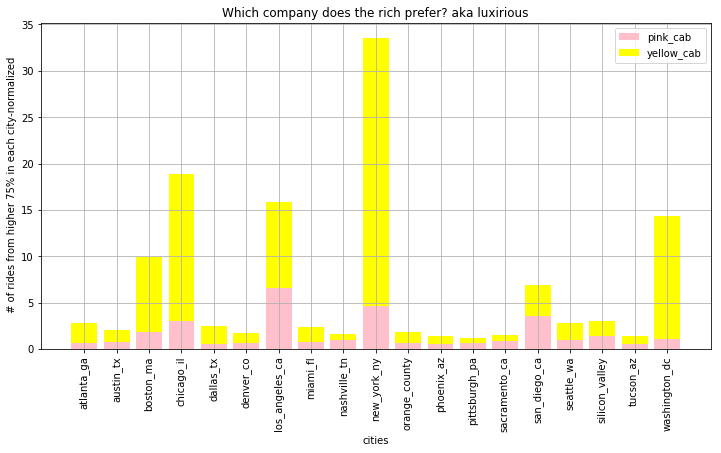

city
atlanta_ga         814885
austin_tx          698371
boston_ma          248968
chicago_il        1955130
dallas_tx          942908
denver_co          754233
los_angeles_ca    1595037
miami_fl          1339155
nashville_tn       327225
new_york_ny       8405837
orange_county     1030185
phoenix_az         943999
pittsburgh_pa      542085
sacramento_ca      545776
san_diego_ca       959307
seattle_wa         671238
silicon_valley    1177609
tucson_az          631442
washington_dc      418859
Name: population, dtype: int32

In [22]:


#num_richpercity=df.query('c_income>=@higher_income_cutoff ').groupby(['city']).costumer_id.nunique()


ind=0
c_rich_pink=[]
c_rich=[]
c_rich_yellow=[]

for city in cities:
#    city='atlanta_ga'
    higher_income_cutoff=df.query('city==@city').quantile(0.75)['c_income']

    num_rides_per_rich=df.query('city==@city & c_income>=@higher_income_cutoff ').groupby(['company'])
    num_richpercity=df.query('city==@city & c_income>=@higher_income_cutoff ').costumer_id.nunique()
    
    c_rich_pink.append(num_rides_per_rich.get_group('pink_cab').count()[0])
    c_rich.append(num_richpercity)#667
    c_rich_yellow.append(num_rides_per_rich.get_group('yellow_cab').count()[0])    
    
plt.figure(figsize=(12,6))
plt.bar(cities, pd.np.divide(c_rich_pink,c_rich), color='pink')
plt.bar(cities, pd.np.divide(c_rich_yellow,c_rich), bottom=pd.np.divide(c_rich_pink,c_rich), color='yellow')

plt.xlabel("cities")
plt.ylabel(" # of rides from higher 75% in each city-normalized")
plt.legend(["pink_cab", "yellow_cab"])
plt.title("Which company does the rich prefer? aka luxirious")
plt.xticks(cities, cities, rotation=90)
plt.grid()
plt.show()

df.groupby(['city']).population.mean()

#CITIES WITH HIGH NUMBER OF RIDES FOR RICH IS not so coincidentally the ones with the highest population YAAAAAAAAAAY 

# #example
# #PER YEAR 
# years=[2016,2017,2018]
# cities=df.city.unique()
# iyear=2017
# year_index=years.index(iyear)
# city='atlanta_ga'
# qlux=df.query('c_income>=@higher_income_cutoff and city==@icity')

# wealthy=qlux.groupby('year')['costumer_id'].nunique()[year_index]
# rides=qlux.groupby('year')['trans_id'].count()[year_index]
# pwealthy=qlux.groupby(['year','company'])['costumer_id'].nunique()[(year_index*2)+0]
# ywealthy=qlux.groupby(['year','company'])['costumer_id'].nunique()[(year_index*2)+1]
# prides=qlux.groupby(['year','company'])['costumer_id'].count()[(year_index*2)+0]
# yrides=qlux.groupby(['year','company'])['costumer_id'].count()[(year_index*2)+1]

# print(city,iyear,year_index,rides,prides,yrides)



### recommendations "Which company is more luxurious ?"

#### To answer this question, we consider the riders with the higher 75% income per city. For this analysis we deal with the time interval as one chunk of data. It shows that the rich use yellow_cab more frequently. 

#### The interesting take from this analysis though, is that there's a strong correlation between the number of rides the rich take and the city in question. Not so coincidentally, cities with higher population have a surge in the number of rides from costumers with high income. This makes alot of sense because these cities are usually known for congested parking lots. For example, new york is known for its dense traffic and scarcity in parking spots, so the rich -especially- would rather use cab companies to the subway. 


<a id='conclusions'></a>

## Over all recommendation & Significant reasoning behind it

# I recommend investing in yellow_cab 

### Reasoning & Observations:
- It seems like yellow_cab is a legacy cab_company that's been around for longer than pink_cab. This explains why dealing with data as one chunk always favors the yellow_Cab since its , generally speaking, the go-to for users.
- Regardless of the status quo that favors yellow_cab, once we focus on how the market is changing over time, pink_cab seems to be picking up its pace since it offers slightly better rates for users, less overhead(profit) on rides. It's slowly getting more costumers from women and older costumers but it's still a very long way till it could be able to compete with yellow_cab 
- Another reasoning for my choice is the instability in the market causing both companies to have less profit in 2018 compared to 2017 and 2017 compared to 2016.This suggests that the market is not right for risky investments in the underdog. 

### Growth opportunities & suggestions:
- I believe yellow_cab has better growth chances if they capitalize on factors where pink_cab is improving. 
- Consider women as their target audience and focus on safety features during rides, could also use femal drivers.
- Provide a phone call alternative to the traditional use of apps to order a cab for elderlies. 
- Decreased cost/km in the four cities where pink cab is ahead: Nashville, Sacramento, San Diego and Pittsburgh 
- Offer packages for credit card users and adverstise their application's ease of use and lack of data breaching. 